In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date
import warnings
import yfinance as yf
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings('ignore')


%matplotlib inline

In [3]:
# Ref: https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95
# ADJUST COLUMN WIDTH IN PANDAS TO SHOW ALL TEXT
# (FOR MODEL PERFORMANCE DISPLAY LATER)

pd.set_option('display.max_colwidth', None)

In [4]:
# PRE-SET PATH TO images FOLDER TO SAVE PLOTS LATER
directory_to_img = os.path.join('..', '..', 'images')

In [5]:
os.makedirs('plots')

In [6]:
# SET SEED FOR REPRODUCIBILITY
seed = 2021

In [7]:
# SELECT START AND END DATE
start = datetime(2014, 1, 1)
end = datetime(2023, 4, 20)


tckr = 'BTC-USD'

ticker = yf.Ticker(tckr)
df = ticker.history(start=start, 
                    end=end, 
                    interval="1d")

In [8]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-15 00:00:00+00:00,30490.750000,30601.740234,30245.882812,30318.496094,11940685378,0.0,0.0
2023-04-16 00:00:00+00:00,30315.976562,30555.537109,30157.832031,30315.355469,12854816417,0.0,0.0
2023-04-17 00:00:00+00:00,30317.146484,30319.197266,29275.371094,29445.044922,17872186762,0.0,0.0


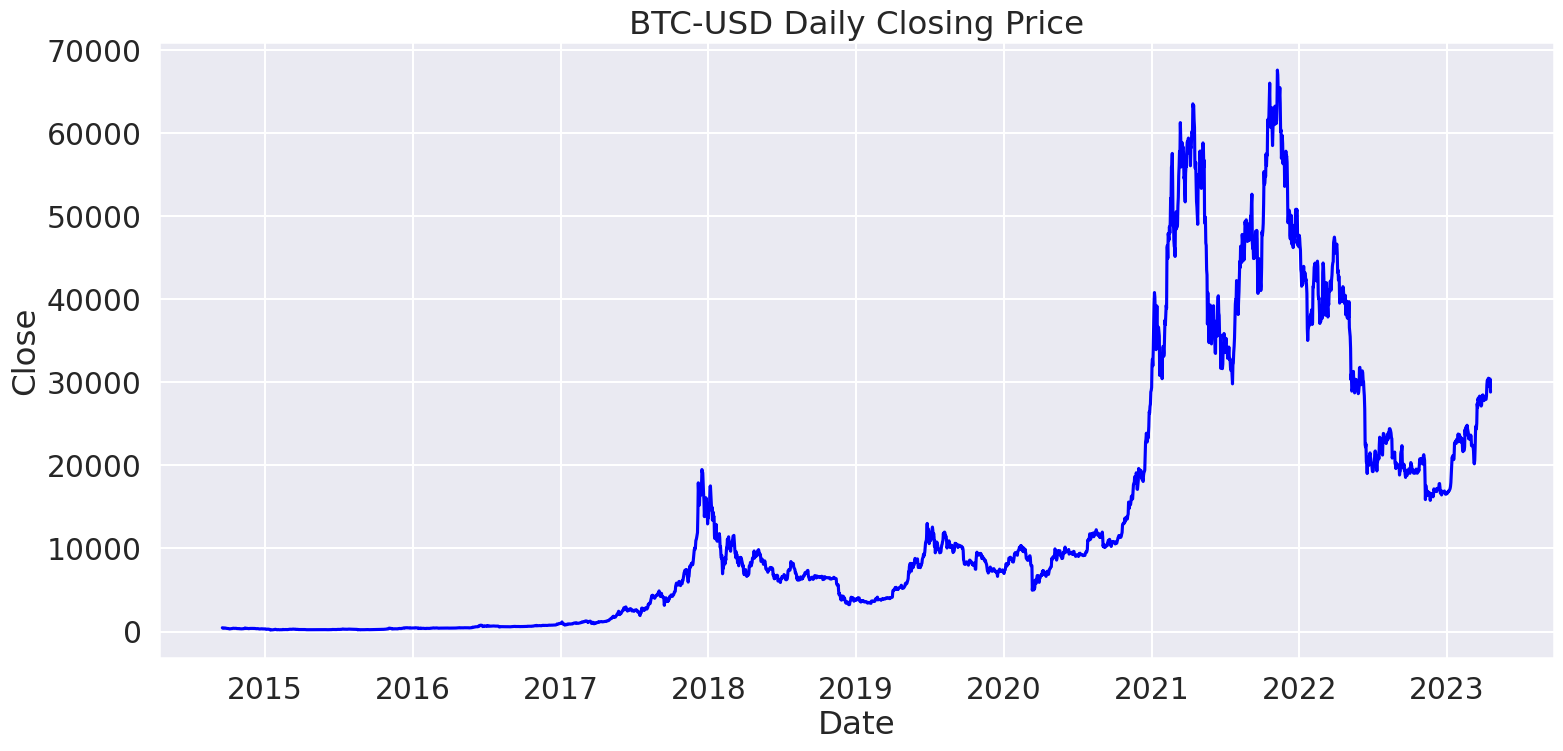

In [9]:
# CHANGE CONTEXT TO poster TO INCREASE FONT SIZES()
#This text is an instruction to change the context to "poster" in order to increase font sizes. 
#"Context" refers to the specific environment or situation in which something is being used or displayed. In this case, it is referring to the context of a document or design, specifically the type of document called a "poster."
#"Font sizes" refer to the size of the letters or characters used in a document or design. Increasing font sizes means making the letters larger and easier to read. 
#Overall, this instruction is telling the user to switch the context of their document or design to "poster" mode in order to increase the font sizes and make the content more visible and readable.
sns.set_context("talk", font_scale=1.3)

# PLOT OUT BTC-USE'S CLOSING PRICES SINCE 2014
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df.index, y=df.Close, color='blue')
    ax.set_title('BTC-USD Daily Closing Price')    
plt.savefig('plots/plot1_close_price.png')

# plt.tight_layout()
#plt.savefig(os.path.join(directory_to_img, 'close.png'), 
            #dpi=300, bbox_inches='tight');

In [10]:
# CALCULATE PRICE RETURNS AS DAILY PERCENTAGE CHANGE USING pct_change()
df['returns'] = 100 * df.Close.pct_change().dropna()
#This code calculates the percentage change between the current and a prior element in the "Close" column of a pandas DataFrame called "df". 
#The "pct_change()" function is a built-in method in pandas that calculates the percentage change between the current and a prior element in a Series or DataFrame. 
#The "Close" column is likely a column in the DataFrame that contains the closing prices of a financial asset, such as a stock or currency, over a period of time. The percentage change in the closing price can be a useful metric for analyzing the performance of the asset.


In [11]:
# CALCULATE LOG RETURNS BASED ON ABOVE FORMULA
df['log_returns'] = np.log(df.Close/df.Close.shift(1))

In [12]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns
Date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,-7.192558,-0.074643
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,-6.984265,-0.072402
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,3.573492,0.035111
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,-2.465854,-0.024968


In [13]:
# DROPPING THE 1ST ROW OF DATA 
# BECAUSE I SHIFTED IT FORWARD TO CALCULATE RETURNS/LOG RETURNS
df.dropna(inplace=True)

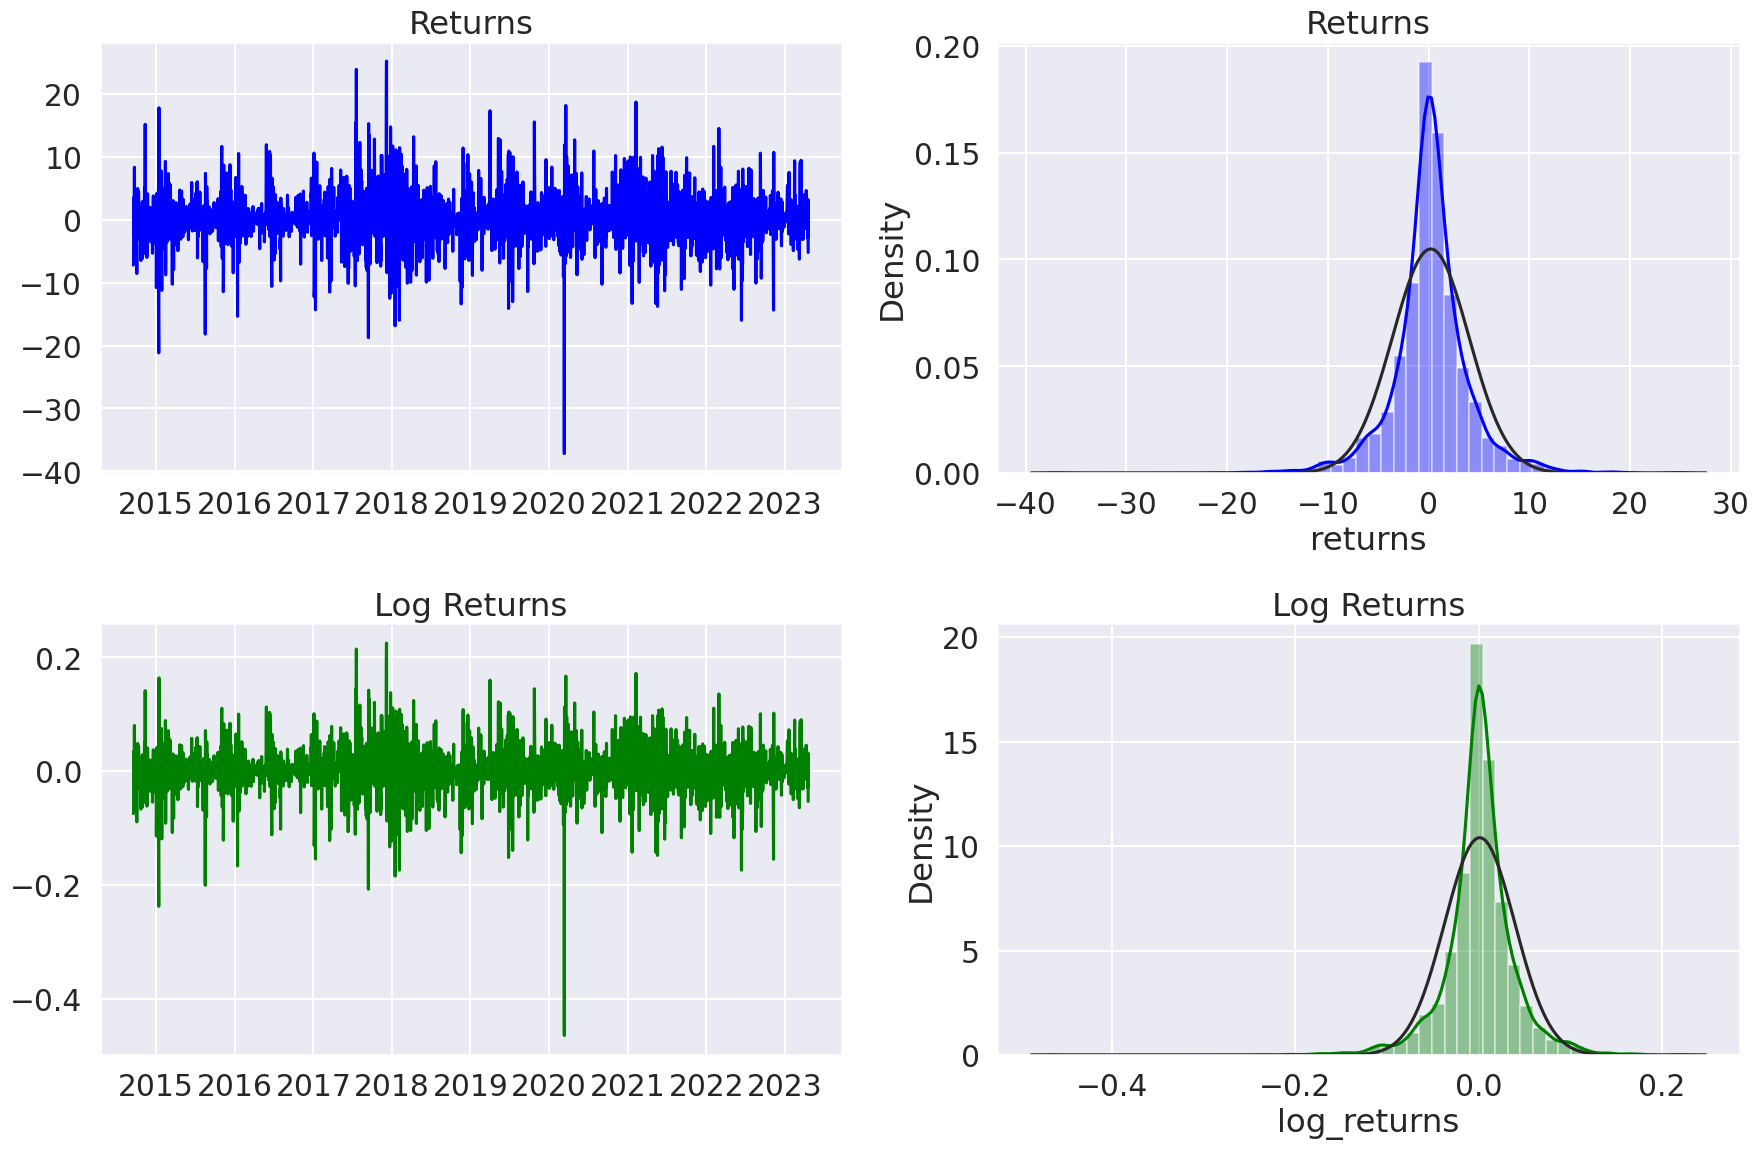

In [14]:
# PLOT DISTRIBUTION PLOTS OF RETURNS & LOG RETURNS
# AND VISUALLY COMPARE THEM WITH THE STANDARD NORMAL DISTRIBUTION
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(df.returns, color='blue')
    axes[0][0].set_title('Returns')

    sns.distplot(df.returns, norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Returns')

    axes[1][0].plot(df.log_returns, color='green')
    axes[1][0].set_title('Log Returns')

    sns.distplot(df.log_returns, norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Log Returns')
    plt.tight_layout()
    plt.savefig( 'plots/plot2_returns_logreturns.png')
    fig.show();

In [15]:
df.returns.describe()

count    3136.000000
mean        0.205161
std         3.802177
min       -37.169539
25%        -1.336194
50%         0.165616
75%         1.775862
max        25.247169
Name: returns, dtype: float64

In [16]:
df.log_returns.describe()

count    3136.000000
mean        0.001321
std         0.038333
min        -0.464730
25%        -0.013452
50%         0.001655
75%         0.017603
max         0.225119
Name: log_returns, dtype: float64

In [17]:
# CREATE A FUNCTION THAT CALCULATE REALIZED VOLATILITY
# FROM SAILY LOG RETURNS
def realized_volatility_daily(series_log_return):
    """
    Get the daily realized volatility which is calculated as the square root
    of sum of squares of log returns within a specific window interval 
    """
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

In [18]:
intervals = [7, 30, 60, 180, 365]
vols_df = {}

# ITERATE OVER intervals LIST
for i in intervals:
    # GET DAILY LOG RETURNS USING THAT INTERVAL
    vols = df.log_returns.rolling(window=i)\
                         .apply(realized_volatility_daily).values

    vols_df[i] = vols

# CONVERT vols_df FROM DICTIONARY TO PANDAS DATAFRAME
vols_df = pd.DataFrame(vols_df, columns=intervals, index=df.index)

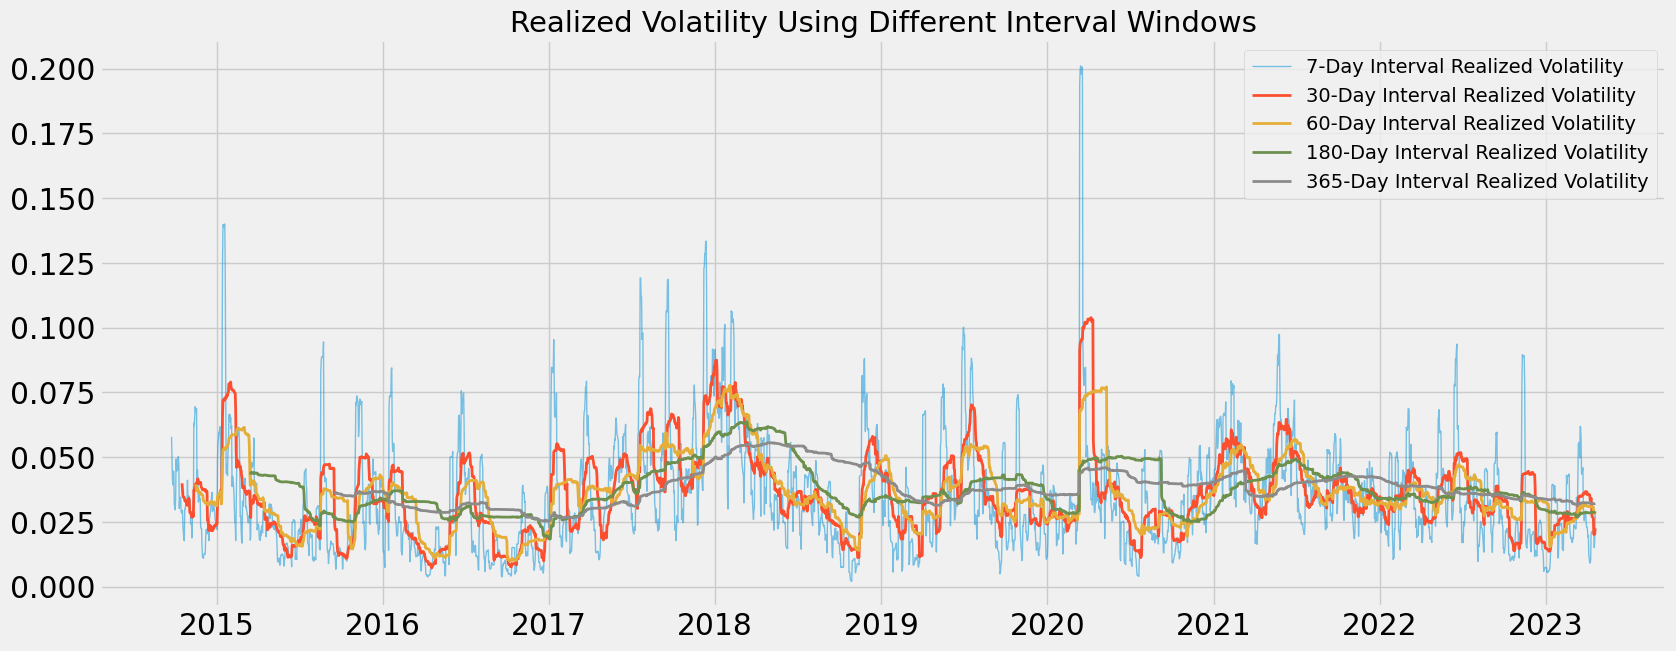

In [19]:
# CHANGING MATPLOTLIB STYLE
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize=(18,7))

for i in intervals:
    if i == 7:
        alpha = 0.5
        lw = 1
    else:
        alpha = 1.0
        lw = 2
    ax.plot(vols_df[i], label=f'{i}-Day Interval Realized Volatility', 
            alpha=alpha, lw=lw)

ax.set_title('Realized Volatility Using Different Interval Windows', fontsize=21)

plt.legend(loc='best', prop={'size': 14})
plt.savefig('plots/plot3_diff_intervals.png',dpi=300)
            
plt.show();

In [20]:
INTERVAL_WINDOW = 30
n_future = 7

# GET BACKWARD LOOKING REALIZED VOLATILITY
df['vol_current'] = df.log_returns.rolling(window=INTERVAL_WINDOW)\
                                   .apply(realized_volatility_daily)

# GET FORWARD LOOKING REALIZED VOLATILITY 
df['vol_future'] = df.log_returns.shift(-n_future)\
                                 .rolling(window=INTERVAL_WINDOW)\
                                 .apply(realized_volatility_daily)

In [21]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns,vol_current,vol_future
count,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3136.0,3136.0,3136.000000,3136.000000,3107.000000,3100.000000
mean,13244.426140,13574.419685,12881.781947,13252.025087,1.661148e+10,0.0,0.0,0.205161,0.001321,0.035602,0.035602
std,16049.309495,16457.190265,15581.702039,16046.735030,1.975220e+10,0.0,0.0,3.802177,0.038333,0.016010,0.016028
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0,-37.169539,-0.464730,0.007228,0.007228
25%,728.260483,738.764999,710.667267,730.717758,1.157578e+08,0.0,0.0,-1.336194,-0.013452,0.025136,0.025127
50%,7400.927002,7538.867432,7241.416992,7403.709717,9.209827e+09,0.0,0.0,0.165616,0.001655,0.033531,0.033478
75%,19146.914062,19413.208984,18730.825195,19155.034180,2.801814e+10,0.0,0.0,1.775862,0.017603,0.044020,0.044040
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0,25.247169,0.225119,0.103878,0.103878


In [22]:
df = df.drop(['Dividends', 'Stock Splits'], axis=1)

In [23]:
df.describe()

,Open,High,Low,Close,Volume,returns,log_returns,vol_current,vol_future
count,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3136.000000,3136.000000,3107.000000,3100.000000
mean,13244.426140,13574.419685,12881.781947,13252.025087,1.661148e+10,0.205161,0.001321,0.035602,0.035602
std,16049.309495,16457.190265,15581.702039,16046.735030,1.975220e+10,3.802177,0.038333,0.016010,0.016028
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,-37.169539,-0.464730,0.007228,0.007228
25%,728.260483,738.764999,710.667267,730.717758,1.157578e+08,-1.336194,-0.013452,0.025136,0.025127
50%,7400.927002,7538.867432,7241.416992,7403.709717,9.209827e+09,0.165616,0.001655,0.033531,0.033478
75%,19146.914062,19413.208984,18730.825195,19155.034180,2.801814e+10,1.775862,0.017603,0.044020,0.044040
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,25.247169,0.225119,0.103878,0.103878


In [24]:
# DROPPING ALL NaN VALUES
df.dropna(inplace=True)

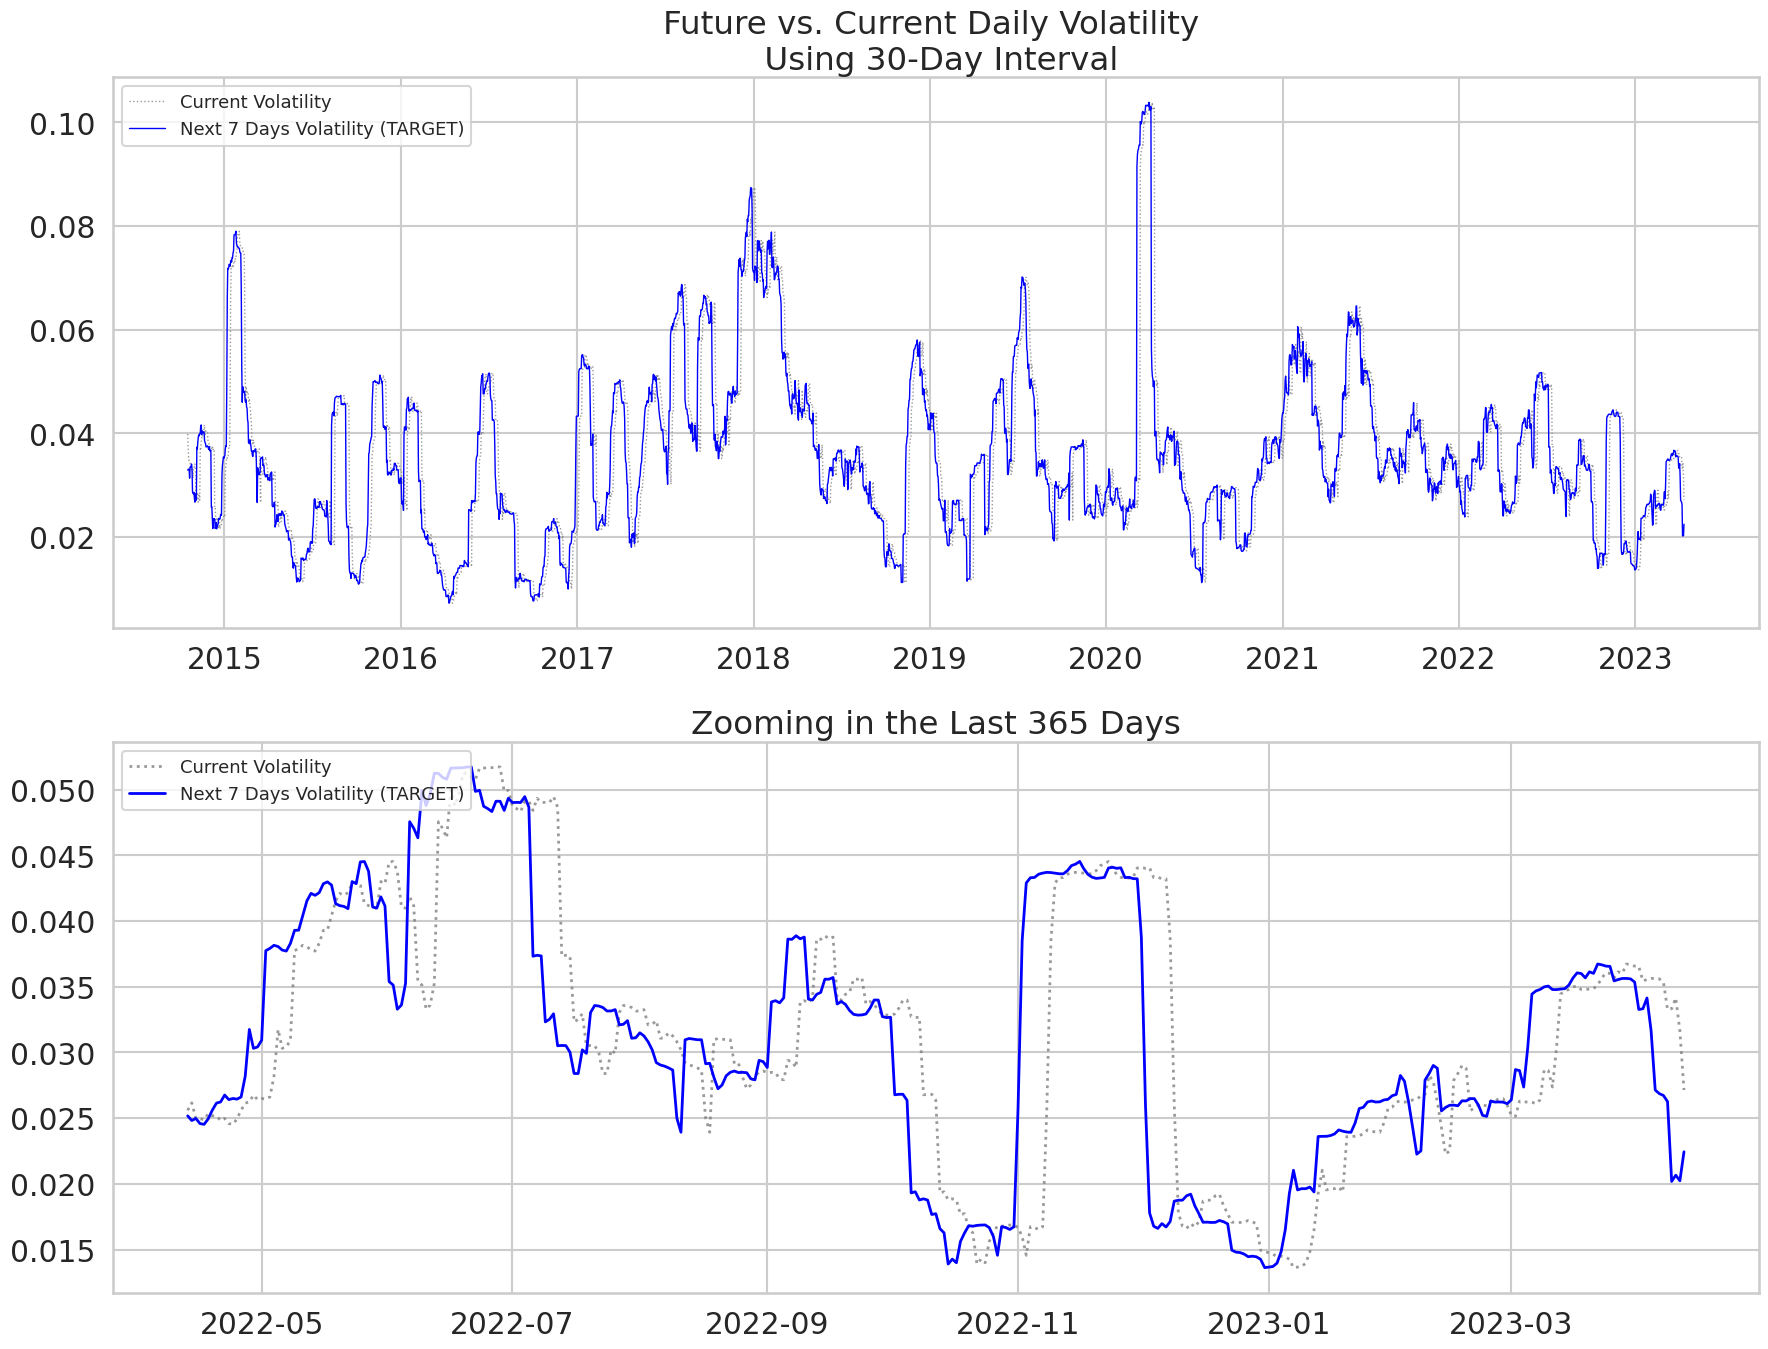

In [25]:
n_zoom = 365
sns.set_context("talk", font_scale=1.3)
# plt.style.use(['seaborn'])

# VISUALIZE REALIZED CURRENT VS. FUTURE VOLATILITY
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, alpha=.8, lw=1, color='gray', ls=':',
            label='Current Volatility')
    ax1.plot(df.vol_future, lw=1, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax2.plot(df.vol_current[-n_zoom:], alpha=.8, lw=2, color='gray', ls=':',
            label='Current Volatility')
    ax2.plot(df.vol_future[-n_zoom:], lw=2, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax1.title.set_text(f'Future vs. Current Daily Volatility \n Using {INTERVAL_WINDOW}-Day Interval')
    ax2.title.set_text(f'Zooming in the Last {n_zoom} Days')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.tight_layout()
    plt.savefig( 'plots/plot_4_daily_vol.jpg',dpi=300, bbox_inches='tight')
                
    plt.show();

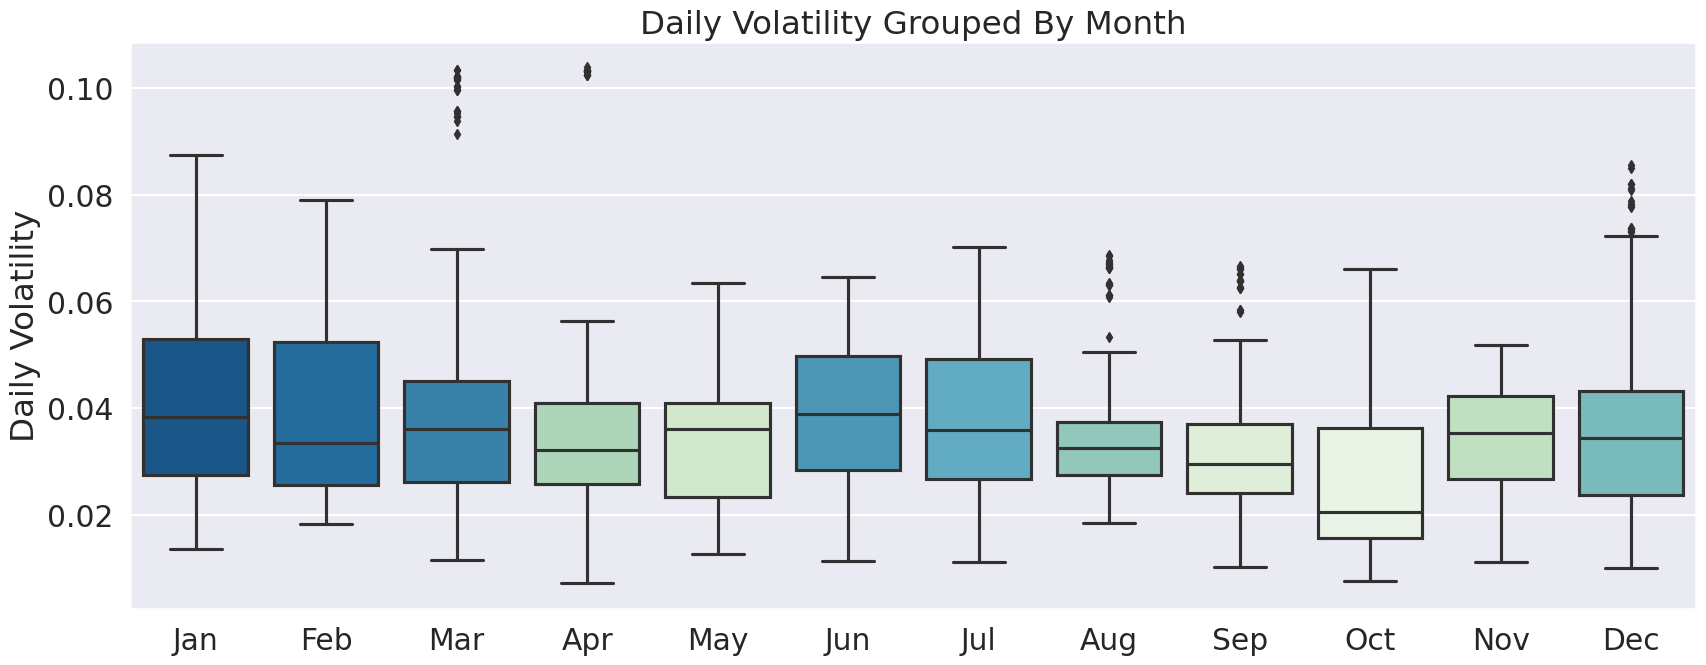

In [26]:
# PRESORT MONTHS IN CHRONOLOGICAL ORDER 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 
                  'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

# GROUP vol_current BY MONTH AND TAKE THE MEAN
data = df.groupby(by=[df.index.month_name()]).vol_current.mean()

# ABBREVIATE MONTH NAME
data.index = [x[:3] for x in data.index]

# SELECT PALETTE
pal = sns.color_palette("GnBu", len(data))

# SORT MONTH BY AVERAGE vol_current
rank = data.argsort().argsort().reindex(ordered_months)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,7))
    
    sns.boxplot(x=[x[:3] for x in df.index.month_name()], 
                y=df.vol_current, 
                palette=np.array(pal)[rank],
                order=ordered_months)
    ax.set(xlabel='', 
           ylabel='Daily Volatility', 
           title='Daily Volatility Grouped By Month')
    plt.savefig("plots/plot5_vol_by_month.png",dpi=300, bbox_inches='tight')
                
    plt.show()

In [27]:
df.vol_current.sort_values(ascending=False)[:50]

Date
2020-04-06 00:00:00+00:00    0.103878
2020-04-03 00:00:00+00:00    0.103330
2020-04-02 00:00:00+00:00    0.103319
2020-03-30 00:00:00+00:00    0.103302
2020-03-31 00:00:00+00:00    0.103300
2020-04-01 00:00:00+00:00    0.103203
2020-04-05 00:00:00+00:00    0.103192
2020-04-04 00:00:00+00:00    0.103175
2020-04-10 00:00:00+00:00    0.103052
2020-04-07 00:00:00+00:00    0.102421
2020-04-09 00:00:00+00:00    0.102414
2020-04-08 00:00:00+00:00    0.102411
2020-03-29 00:00:00+00:00    0.102179
2020-03-24 00:00:00+00:00    0.102140
2020-03-25 00:00:00+00:00    0.102018
2020-03-23 00:00:00+00:00    0.101864
2020-03-26 00:00:00+00:00    0.101844
2020-03-28 00:00:00+00:00    0.101738
2020-03-27 00:00:00+00:00    0.101523
2020-03-22 00:00:00+00:00    0.100300
2020-03-19 00:00:00+00:00    0.100166
2020-03-20 00:00:00+00:00    0.099710
2020-03-21 00:00:00+00:00    0.099709
2020-03-17 00:00:00+00:00    0.095724
2020-03-18 00:00:00+00:00    0.095614
2020-03-16 00:00:00+00:00    0.095421
2020-03

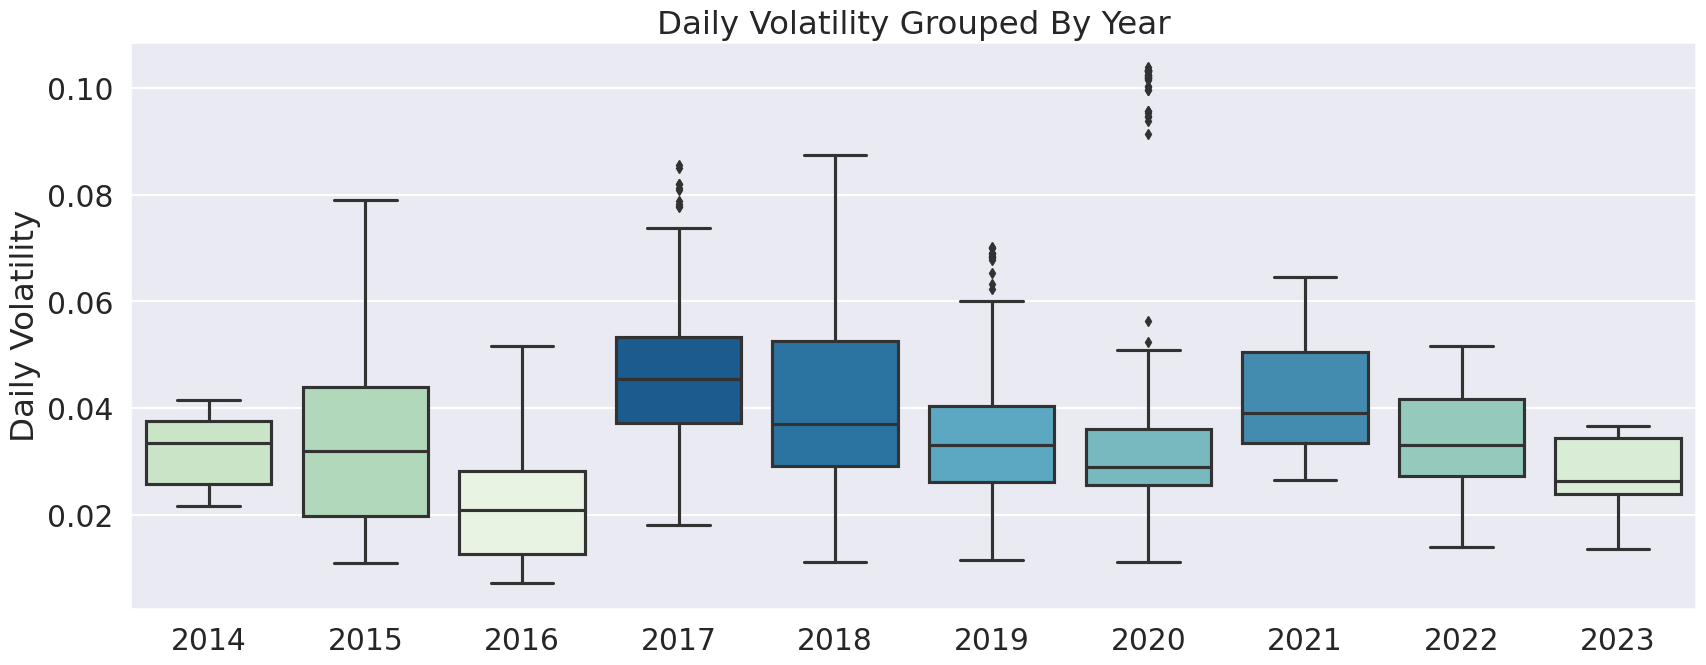

In [28]:
# GROUP vol_current BY YEAR AND TAKE THE MEAN
data = df.groupby(by=[df.index.year]).vol_current.mean()

# SELECT PALETTE
pal = sns.color_palette("GnBu", len(data))

# SORT MONTH BY AVERAGE vol_current
rank = data.argsort().argsort()

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,7))
    
    sns.boxplot(x=df.index.year, 
                y=df.vol_current, 
                palette=np.array(pal)[rank])
    ax.set(xlabel='', 
           ylabel='Daily Volatility', 
           title='Daily Volatility Grouped By Year')
    plt.savefig("plots/plot_6vol_by_year.png",dpi=300, bbox_inches='tight') 
                
    plt.show()

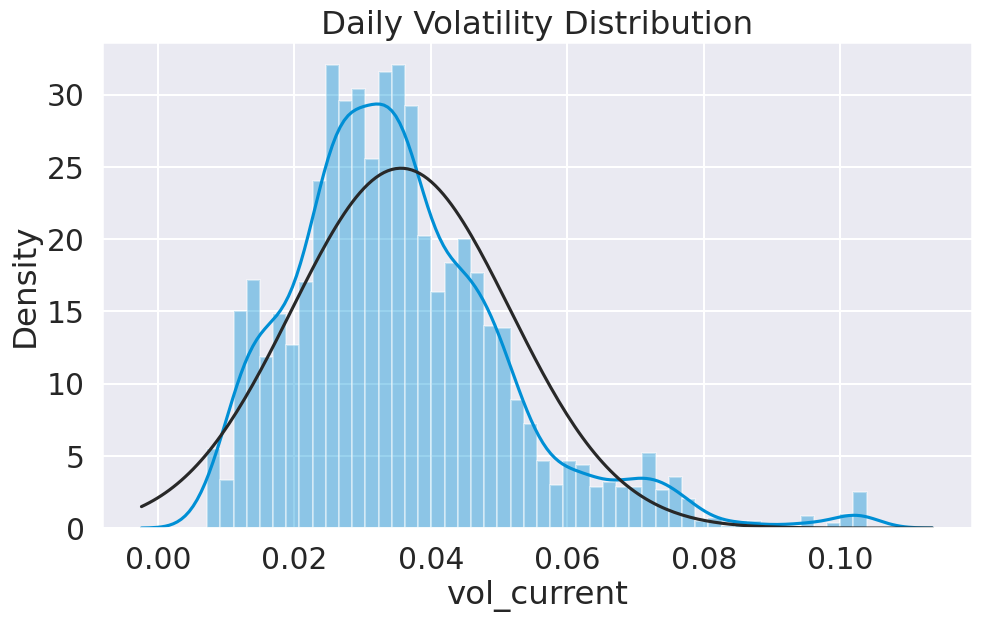

In [29]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df.vol_current, norm_hist=True, fit=stats.norm,
                bins=50, ax=ax)
    plt.title('Daily Volatility Distribution')
    plt.savefig("plots/plot_7_vol_dist.png", dpi=300, bbox_inches='tight') 
               
    plt.show();

In [30]:
# LOG RETURNS
adfuller_results = adfuller(df.log_returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -16.824651132174196
p-value: 1.1708439356656404e-29
Critical Values:
1%: -3.4325
5%: -2.8625
10%: -2.5673


In [31]:
# RETURNS
adfuller_results = adfuller(df.returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -56.764786166760956
p-value: 0.0
Critical Values:
1%: -3.4325
5%: -2.8625
10%: -2.5673


In [32]:
# PRE-DETERMINE DESIRED TEST & VALIDATION SIZES
test_size = 300
val_size = 400

# CONVERT TO INDICES
split_time_1 = len(df) - (val_size + test_size)
split_time_2 = len(df) - test_size

# GET CORRESPONDING DATETIME INDICES FOR EACH SET
train_idx = df.index[:split_time_1]
val_idx = df.index[split_time_1:split_time_2]
test_idx = df.index[split_time_2:]

In [33]:
print(f'TRAINING \tFrom: {train_idx[0]} \tto: {train_idx[-1]} \t{len(train_idx)} days')
print(f'VALIDATION \tFrom: {val_idx[0]} \tto: {val_idx[-1]} \t{len(val_idx)} days')
print(f'TEST \t\tFrom: {test_idx[0]} \tto: {test_idx[-1]} \t{len(test_idx)} days')

TRAINING 	From: 2014-10-17 00:00:00+00:00 	to: 2021-05-12 00:00:00+00:00 	2400 days
VALIDATION 	From: 2021-05-13 00:00:00+00:00 	to: 2022-06-16 00:00:00+00:00 	400 days
TEST 		From: 2022-06-17 00:00:00+00:00 	to: 2023-04-12 00:00:00+00:00 	300 days


In [34]:
# SPLIT FORWARD VOLATILITY INTO 3 PARTS 
# (this would be the target)
y_train = df.vol_future[train_idx]
y_val = df.vol_future[val_idx]
y_test = df.vol_future[test_idx]

In [35]:
# SPLIT CURRENT DAILY REALIZED VOLATILITY INTO 3 PARTS 
# (this would be the input for baseline, random walk, and NN models)
x_train = df.vol_current[train_idx]
x_val = df.vol_current[val_idx]
x_test = df.vol_current[test_idx]

In [36]:
# SPLIT RETURNS INTO 3 PARTS
# (this would be the input for GARCH models)
r_train = df.returns[train_idx]
r_val = df.returns[val_idx]
r_test = df.returns[test_idx]

In [37]:
# SPLIT LOG RETURNS INTO 3 PARTS
# (mostly for visualization)
lr_train = df.log_returns[train_idx]
lr_val = df.log_returns[val_idx]
lr_test = df.log_returns[test_idx]

In [38]:
y_train.describe()

count    2400.000000
mean        0.035912
std         0.017329
min         0.007228
25%         0.024081
50%         0.033258
75%         0.045598
max         0.103878
Name: vol_future, dtype: float64

In [39]:
x_train.describe()

count    2400.000000
mean        0.035874
std         0.017315
min         0.007228
25%         0.024081
50%         0.033258
75%         0.045493
max         0.103878
Name: vol_current, dtype: float64

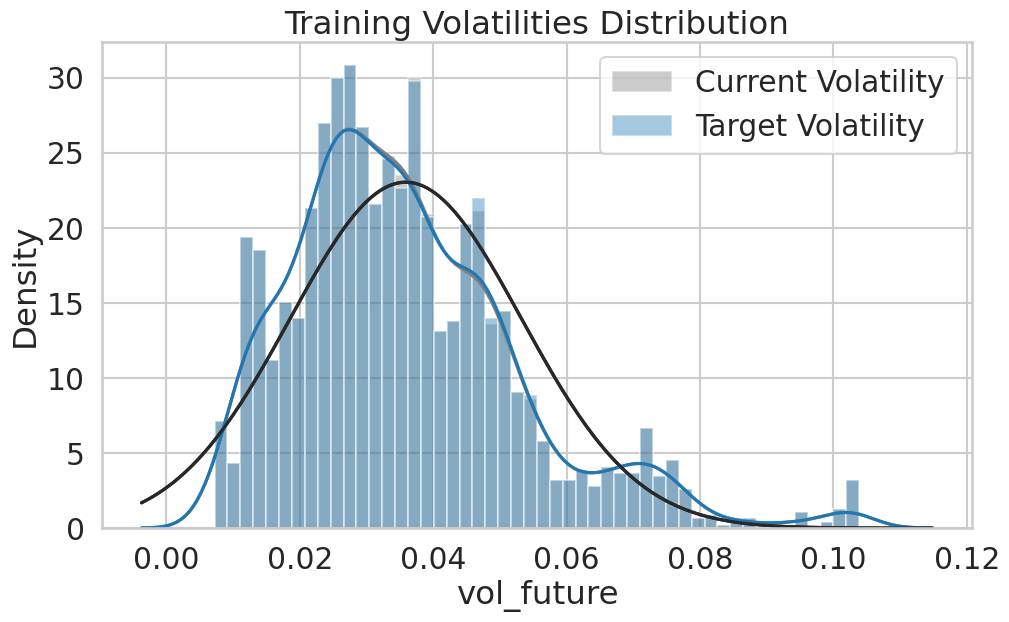

In [40]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train, norm_hist=True, fit=stats.norm, 
                 color='gray', 
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train, norm_hist=True, fit=stats.norm,
                 color='tab:blue', 
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatilities Distribution')
    plt.legend()
    plt.savefig("plots/plot8_training_vol_dist.png",dpi=300, bbox_inches='tight')
                
    plt.show();

In [41]:
def transform_volatility_to_scaler(scaler, tf_series):
    '''
    Transform a series to a fitted scaler
    '''
    idx = tf_series.index
    output = pd.Series(scaler.transform(tf_series.values.reshape(-1,1))[:,0],
                       index=idx)
    return output

In [42]:
# INITIATE SCALER
scaler_vol = MinMaxScaler()

# FIT SCALER TO CURRENT VOLATILITY IN TRAINING SET
scaler_vol = scaler_vol.fit(x_train.values.reshape(-1,1))

In [43]:
# TRANSFORM TRAINING CURRENT & FUTURE VOLATILITIES 
x_train_scaled = transform_volatility_to_scaler(scaler_vol, x_train)
y_train_scaled = transform_volatility_to_scaler(scaler_vol, y_train)

# TRANSFORMING VALIDATION CURRENT & FUTURE VOLATILITIES
x_val_scaled = transform_volatility_to_scaler(scaler_vol, x_val)
y_val_scaled = transform_volatility_to_scaler(scaler_vol, y_val)

# TRANSFORMING TEST CURRENT & FUTURE VOLATILITIES
x_test_scaled = transform_volatility_to_scaler(scaler_vol, x_test)
y_test_scaled = transform_volatility_to_scaler(scaler_vol, y_test)

In [44]:
x_train.head(10)

Date
2014-10-17 00:00:00+00:00    0.039872
2014-10-18 00:00:00+00:00    0.037566
2014-10-19 00:00:00+00:00    0.035089
2014-10-20 00:00:00+00:00    0.034629
2014-10-21 00:00:00+00:00    0.034362
2014-10-22 00:00:00+00:00    0.034364
2014-10-23 00:00:00+00:00    0.033347
2014-10-24 00:00:00+00:00    0.032900
2014-10-25 00:00:00+00:00    0.033009
2014-10-26 00:00:00+00:00    0.033083
Name: vol_current, dtype: float64

In [45]:
y_train.head(10)

Date
2014-10-17 00:00:00+00:00    0.032900
2014-10-18 00:00:00+00:00    0.033009
2014-10-19 00:00:00+00:00    0.033083
2014-10-20 00:00:00+00:00    0.033017
2014-10-21 00:00:00+00:00    0.031334
2014-10-22 00:00:00+00:00    0.033474
2014-10-23 00:00:00+00:00    0.033426
2014-10-24 00:00:00+00:00    0.033602
2014-10-25 00:00:00+00:00    0.034075
2014-10-26 00:00:00+00:00    0.033154
Name: vol_future, dtype: float64

In [46]:
x_train_scaled.head(10)

Date
2014-10-17 00:00:00+00:00    0.337754
2014-10-18 00:00:00+00:00    0.313894
2014-10-19 00:00:00+00:00    0.288269
2014-10-20 00:00:00+00:00    0.283501
2014-10-21 00:00:00+00:00    0.280738
2014-10-22 00:00:00+00:00    0.280764
2014-10-23 00:00:00+00:00    0.270238
2014-10-24 00:00:00+00:00    0.265613
2014-10-25 00:00:00+00:00    0.266743
2014-10-26 00:00:00+00:00    0.267507
dtype: float64

In [47]:
y_train_scaled.head(10)

Date
2014-10-17 00:00:00+00:00    0.265613
2014-10-18 00:00:00+00:00    0.266743
2014-10-19 00:00:00+00:00    0.267507
2014-10-20 00:00:00+00:00    0.266830
2014-10-21 00:00:00+00:00    0.249415
2014-10-22 00:00:00+00:00    0.271550
2014-10-23 00:00:00+00:00    0.271058
2014-10-24 00:00:00+00:00    0.272883
2014-10-25 00:00:00+00:00    0.277768
2014-10-26 00:00:00+00:00    0.268242
dtype: float64

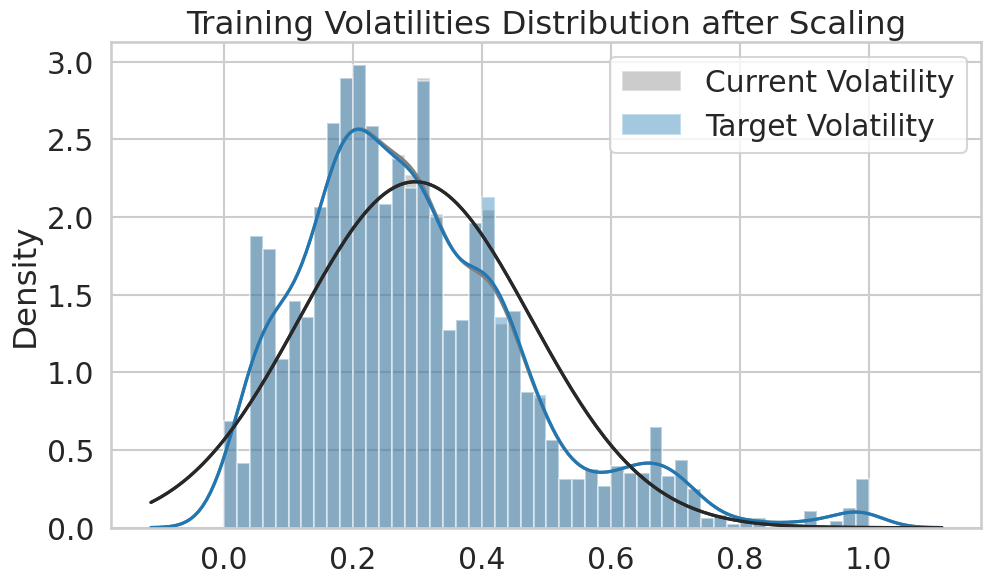

In [48]:
# PLOTTING VOLATILITIES AFTER SCALING
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train_scaled, norm_hist=True, fit=stats.norm, 
                 color='gray', 
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train_scaled, norm_hist=True, fit=stats.norm,
                 color='tab:blue', 
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatilities Distribution after Scaling')
    plt.legend()
    plt.savefig("plots/plot9_vol_dist_after_scale.png",dpi=300, bbox_inches='tight')
                
    plt.show();

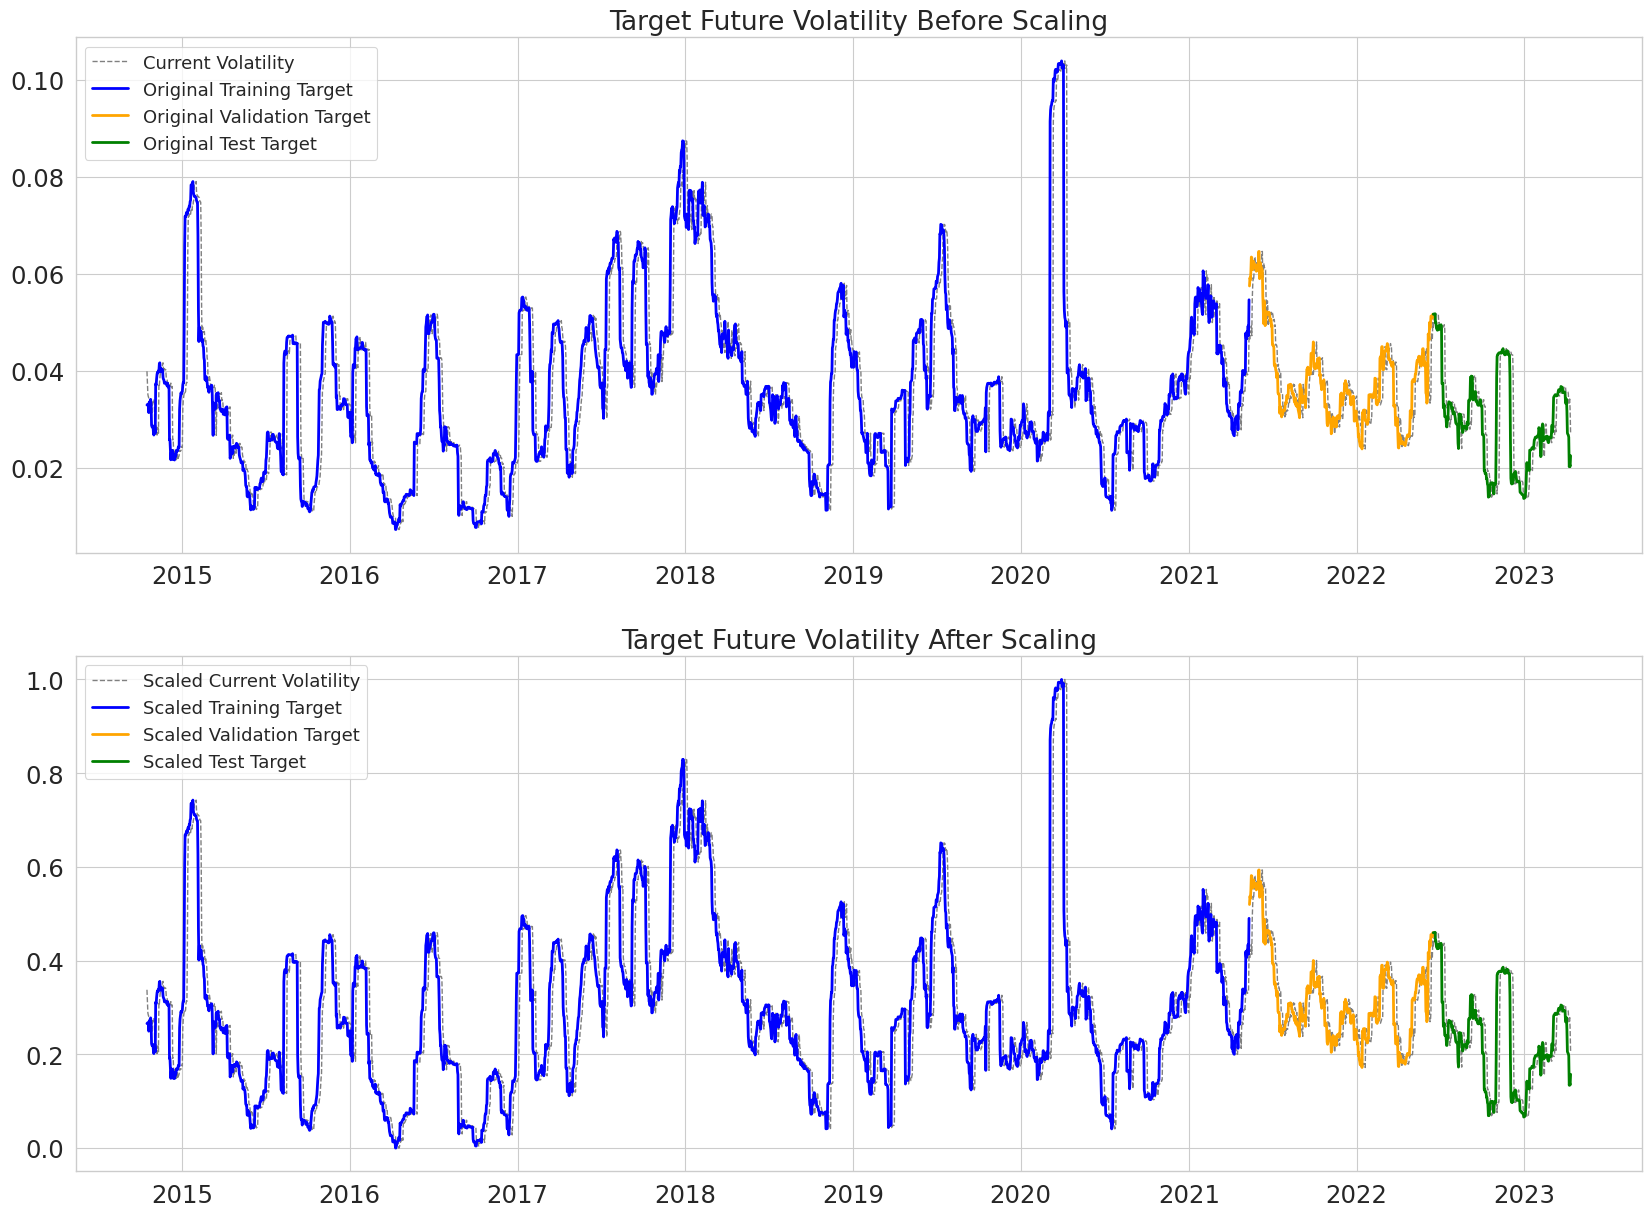

In [49]:
sns.set_context("paper", font_scale=2)

# VISUALIZE TRAIN/VALIDATION/TEST vol_future BEFORE & AFTER TRAINING
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, lw=1, color='gray', ls='--',
                label='Current Volatility')
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    ax1.plot(y_val, color='orange', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='green', label='Original Test Target', lw=2)

    ax1.title.set_text('Target Future Volatility Before Scaling')

    ax2.plot(transform_volatility_to_scaler(scaler_vol, df.vol_current), 
                lw=1, color='gray', ls='--',
                label='Scaled Current Volatility')
    ax2.plot(y_train_scaled, color='blue', label='Scaled Training Target', lw=2)
    ax2.plot(y_val_scaled, color='orange', label='Scaled Validation Target', lw=2)
    ax2.plot(y_test_scaled, color='green', label='Scaled Test Target', lw=2)

    ax2.title.set_text('Target Future Volatility After Scaling')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.savefig( 'plots/plot10_train_val_test_org_scled.png',dpi=300, bbox_inches='tight') 
                
    plt.show();

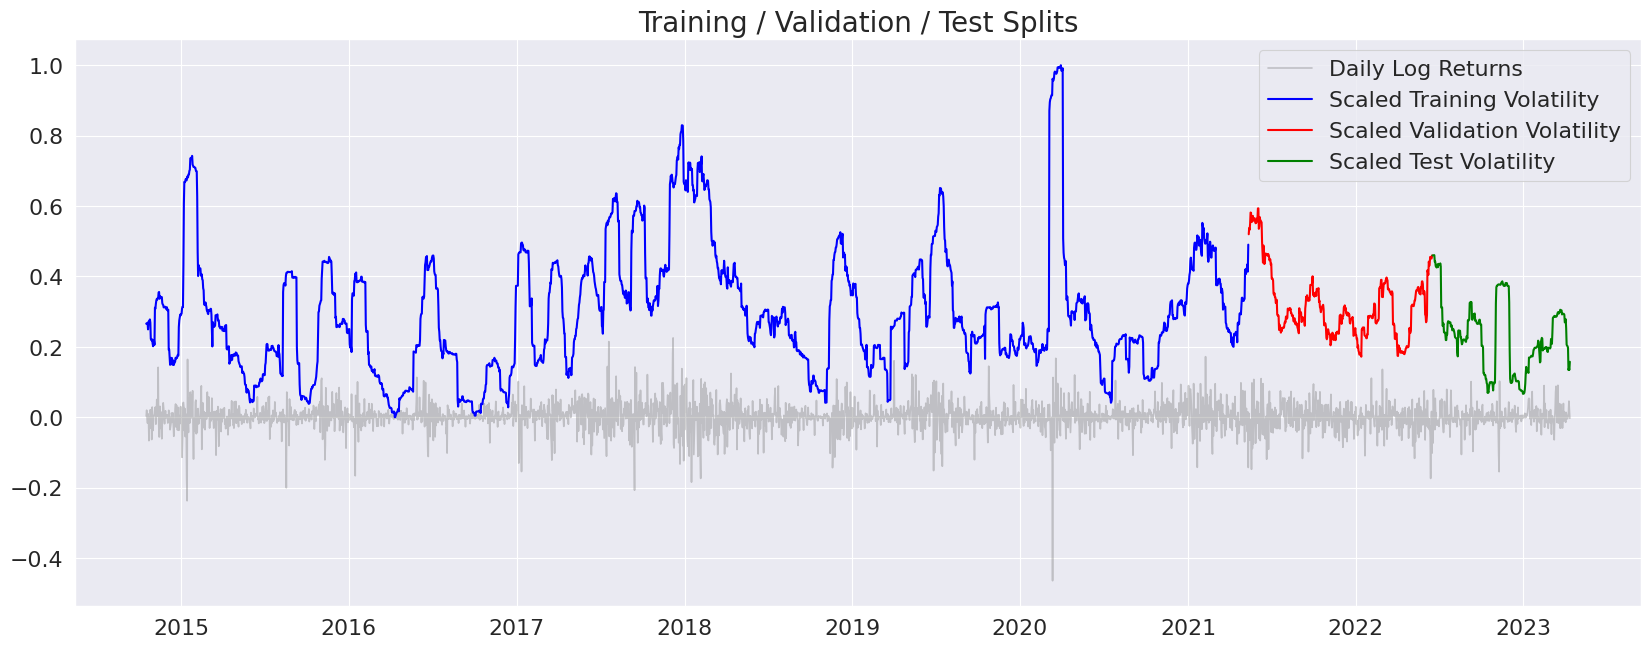

In [50]:
sns.set_context("paper", font_scale=1.8)
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(18,7))

    plt.plot(df.log_returns, color='gray', label='Daily Log Returns', alpha=0.4)

    plt.plot(y_train_scaled, color='blue', 
             label='Scaled Training Volatility', lw=1.5)
    plt.plot(y_val_scaled, color='red', 
             label='Scaled Validation Volatility', lw=1.5)
    plt.plot(y_test_scaled, color='green', 
             label='Scaled Test Volatility', lw=1.5)

    plt.plot()
    plt.title('Training / Validation / Test Splits', fontsize=20)
    plt.legend(frameon=True)
    plt.savefig('plots/plot11_train_val_test.png',dpi=300, bbox_inches='tight')
                
    plt.show();

In [51]:
df

,Open,High,Low,Close,Volume,returns,log_returns,vol_current,vol_future
Date,,,,,,,,,
2014-10-17 00:00:00+00:00,382.756012,385.477997,375.389008,383.757996,13600700,0.314201,0.003137,0.039872,0.032900
2014-10-18 00:00:00+00:00,383.976013,395.157990,378.971008,391.441986,11416800,2.002301,0.019825,0.037566,0.033009
2014-10-19 00:00:00+00:00,391.253998,393.938995,386.457001,389.545990,5914570,-0.484362,-0.004855,0.035089,0.033083
2014-10-20 00:00:00+00:00,389.230988,390.084015,378.252014,382.845001,16419000,-1.720205,-0.017352,0.034629,0.033017
2014-10-21 00:00:00+00:00,382.420990,392.645996,380.834015,386.475006,14188900,0.948166,0.009437,0.034362,0.031334
...,...,...,...,...,...,...,...,...,...
2023-04-08 00:00:00+00:00,27920.513672,28159.863281,27883.386719,27947.794922,9373255556,0.078549,0.000785,0.033266,0.026255
2023-04-09 00:00:00+00:00,27952.367188,28532.830078,27828.480469,28333.050781,12175322951,1.378484,0.013691,0.033324,0.020182
2023-04-10 00:00:00+00:00,28336.027344,29771.464844,28189.271484,29652.980469,19282400094,4.658622,0.045534,0.034141,0.020659


In [52]:
df.to_csv('my_dataframe.csv', index=False)